In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px 

c:\Users\Angel\.conda\envs\ia\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Dataset limpio
wine = pd.read_csv('winequality_clean.csv')

Segun el dataset de wine, realice las siguientes actividades:
- Limpie las variables numericas. (evalue primero si vale la pena estretificar por type), en caso de existir valores atipicos remplece por la media.
- Aplique PCA utilizando maximo 5 columnas (evalue si el PCA vale la pena hacer uno para white y otro para red)
        - No se debe de usar quality para este ejercicio
- Una ves tenga el PCA, aplique un algoritmo de k-means para crear tres perfiles del vino. (explique que significa cada perfil)
- Agregue la nueva variable al dateset y elimine las columnas que hayan formado parte de analisis del PCA, tanto para white como para red, en caso que hayan sido entrenamientos distintos.
- Crea la varible de respuesta de la siguiente manera:
    - if quality >= 5 ? 1 else 0
- Elimine la variable quality del dataset
- Aplique los siguientes entrenamientos de MLS (evalue primero si vale la pena estretificar por type):
    - Regresion Logistica
    - NN
    - Aroboles de desiciones
    - Random Forest
- Explique cual de los entrenamientos fue el mejor?

In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.009734,0.313649,0.317829,5.186632,0.050949,29.893249,115.427350,0.994685,3.213734,0.516885,10.490004,5.763113
std,0.878065,0.120190,0.106051,4.307623,0.018101,16.272485,55.909441,0.002935,0.151349,0.118051,1.189748,0.757416
min,4.500000,0.080000,0.040000,0.600000,0.009000,1.000000,6.000000,0.987110,2.800000,0.220000,8.000000,4.000000
25%,6.400000,0.230000,0.260000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.311648,3.000000,0.047000,29.000000,118.000000,0.994880,3.210000,0.510000,10.300000,6.000000
75%,7.500000,0.370000,0.380000,7.800000,0.059000,41.000000,155.000000,0.996990,3.320000,0.590000,11.300000,6.000000
max,9.600000,0.655000,0.600000,17.500000,0.105000,77.000000,272.000000,1.003690,3.630000,0.850000,14.000000,7.000000


In [5]:
wines_n = wine.loc[:,['fixed acidity', 'volatile acidity','pH', 'alcohol', 'density']].copy()
# Correlacion

correlacion = wines_n.corr()
correlacion


,fixed acidity,volatile acidity,pH,alcohol,density
fixed acidity,1.000000,0.146988,-0.210268,-0.137607,0.354978
volatile acidity,0.146988,1.000000,0.176798,-0.015431,0.236275
pH,-0.210268,0.176798,1.000000,0.107260,0.015587
alcohol,-0.137607,-0.015431,0.107260,1.000000,-0.702234
density,0.354978,0.236275,0.015587,-0.702234,1.000000


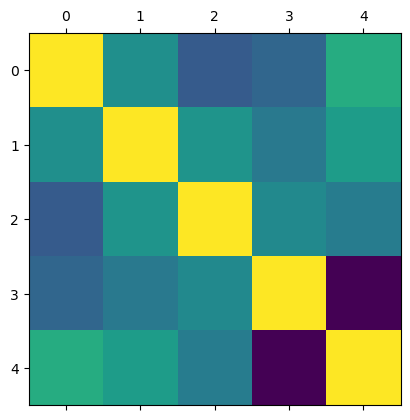

In [6]:
plt.matshow(correlacion) 

In [29]:
# Implementacion de PCA
cols_to_use = ['fixed acidity', 'volatile acidity','pH', 'alcohol', 'density']

In [8]:
x = wine.loc[:, cols_to_use].values
x

array([[ 7.     ,  0.27   ,  3.     ,  8.8    ,  1.001  ],
       [ 6.3    ,  0.3    ,  3.3    ,  9.5    ,  0.994  ],
       [ 8.1    ,  0.28   ,  3.26   , 10.1    ,  0.9951 ],
       ...,
       [ 6.3    ,  0.51   ,  3.42   , 11.     ,  0.99574],
       [ 5.9    ,  0.645  ,  3.57   , 10.2    ,  0.99547],
       [ 6.     ,  0.31   ,  3.39   , 11.     ,  0.99549]])

In [9]:
x = StandardScaler().fit_transform(x)
x

array([[-0.01108707, -0.36319143, -1.41229747, -1.42058099,  2.15167442],
       [-0.80835621, -0.11356747,  0.57002498, -0.83217593, -0.23340129],
       [ 1.24176445, -0.27998344,  0.30571532, -0.32782874,  0.14139632],
       ...,
       [-0.80835621,  1.63380029,  1.36295396,  0.42869204,  0.35946038],
       [-1.26393858,  2.75710814,  2.35411518, -0.24377088,  0.26746461],
       [-1.15004299, -0.03035948,  1.16472171,  0.42869204,  0.27427911]])

In [10]:
x = np.around(x, 2)

In [11]:
np.nan_to_num(x)

array([[-0.01, -0.36, -1.41, -1.42,  2.15],
       [-0.81, -0.11,  0.57, -0.83, -0.23],
       [ 1.24, -0.28,  0.31, -0.33,  0.14],
       ...,
       [-0.81,  1.63,  1.36,  0.43,  0.36],
       [-1.26,  2.76,  2.35, -0.24,  0.27],
       [-1.15, -0.03,  1.16,  0.43,  0.27]])

In [12]:
pca = PCA(n_components=2)

In [13]:
principalComponents = pca.fit_transform(x)

In [14]:
pcadf = pd.DataFrame(data=principalComponents ,columns=['c1','c2']) 

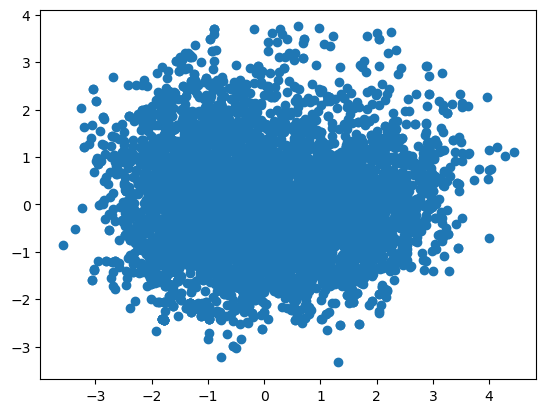

In [15]:
plt.scatter( pcadf['c1'] , pcadf['c2'] )

In [16]:
# aplique un algoritmo de k-means para crear tres perfiles del vino
kmeans = KMeans(n_clusters=3).fit(pcadf)

In [17]:
kmeans.cluster_centers_

array([[ 1.47121881, -0.06314063],
       [-0.90499969,  1.25397273],
       [-0.84158111, -0.7450035 ]])

In [18]:
centroids = kmeans.cluster_centers_


In [19]:
kmeans.labels_

array([2, 1, 2, ..., 1, 1, 0])

In [20]:
pcadf

,c1,c2
0,-2.311432,-1.168753
1,0.080666,0.417446
2,-0.689844,-0.191424
3,-0.444718,-0.601885
4,-0.444718,-0.601885
...,...,...
6492,-0.036881,2.817914
6493,0.532585,3.041954
6494,0.119197,2.257861
6495,-0.178382,3.710895


In [21]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,5.444326,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6.0
1,white,6.3,0.300,0.34,1.600000,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6.0
2,white,8.1,0.280,0.40,6.900000,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6.0
3,white,7.2,0.230,0.32,8.500000,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6.0
4,white,7.2,0.230,0.32,8.500000,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.000000,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5.0
6493,red,5.9,0.550,0.10,2.200000,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6.0
6494,red,6.3,0.510,0.13,2.300000,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6.0
6495,red,5.9,0.645,0.12,2.000000,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5.0


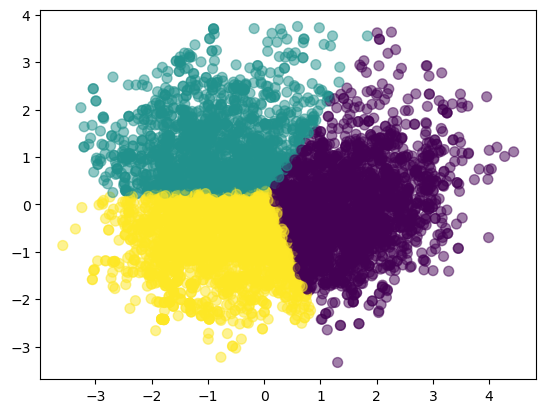

In [22]:
plt.scatter(pcadf['c1'], pcadf['c2'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)

In [23]:
wines_n['cluster'] = kmeans.labels_

In [24]:
wines_n

,fixed acidity,volatile acidity,pH,alcohol,density,cluster
0,7.0,0.270,3.00,8.8,1.00100,2
1,6.3,0.300,3.30,9.5,0.99400,1
2,8.1,0.280,3.26,10.1,0.99510,2
3,7.2,0.230,3.19,9.9,0.99560,2
4,7.2,0.230,3.19,9.9,0.99560,2
...,...,...,...,...,...,...
6492,6.2,0.600,3.45,10.5,0.99490,1
6493,5.9,0.550,3.52,11.2,0.99512,1
6494,6.3,0.510,3.42,11.0,0.99574,1
6495,5.9,0.645,3.57,10.2,0.99547,1


In [25]:
# vino con mayor acidez, menor alcohol y  densidad
wines_n.loc[wines_n['cluster'] == 0, :].describe()

,fixed acidity,volatile acidity,pH,alcohol,density,cluster
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.0
mean,6.536333,0.271369,3.230235,11.532808,0.991770,0.0
std,0.742504,0.090128,0.140922,0.986425,0.001641,0.0
min,4.500000,0.080000,2.800000,8.000000,0.987110,0.0
25%,6.000000,0.200000,3.140000,10.800000,0.990600,0.0
50%,6.500000,0.260000,3.220000,11.500000,0.991700,0.0
75%,7.000000,0.320000,3.320000,12.300000,0.992893,0.0
max,9.400000,0.650000,3.630000,14.000000,0.997600,0.0


In [26]:
# vino con menor acidez, mayor alcohol y densidad
wines_n.loc[wines_n['cluster'] == 1, :].describe()

,fixed acidity,volatile acidity,pH,alcohol,density,cluster
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.0
mean,7.247881,0.440650,3.336340,10.117412,0.996742,1.0
std,0.838475,0.124432,0.122182,0.853150,0.001811,0.0
min,5.000000,0.105000,2.920000,8.000000,0.990900,1.0
25%,6.700000,0.331546,3.250000,9.500000,0.995545,1.0
50%,7.135143,0.430000,3.340000,9.900000,0.996700,1.0
75%,7.700000,0.550000,3.420000,10.700000,0.997810,1.0
max,9.600000,0.655000,3.630000,13.400000,1.003690,1.0


In [27]:
# vino con acidez intermedia, alcohol y densidad intermedia
wines_n.loc[wines_n['cluster'] == 2, :].describe()

,fixed acidity,volatile acidity,pH,alcohol,density,cluster
count,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.0
mean,7.312123,0.272975,3.119398,9.726611,0.996169,2.0
std,0.826421,0.078521,0.110309,0.751467,0.002156,0.0
min,4.900000,0.090000,2.800000,8.400000,0.990380,2.0
25%,6.700000,0.220000,3.050000,9.200000,0.994600,2.0
50%,7.200000,0.270000,3.120000,9.500000,0.996100,2.0
75%,7.800000,0.320000,3.190000,10.200000,0.997820,2.0
max,9.600000,0.655000,3.470000,13.200000,1.003200,2.0


Que significa cada cluster (Perfil del vino)
- Cluster 0:Caracteristicas del vino con mayor acidez, menor alcohol y  densidad
- Cluster 1: Caracteristicas del vino con menor acidez, mayor alcohol y densidad
- Cluster 2: Caracteristicas del vino con acidez intermedia, alcohol y densidad intermedia

In [ ]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=kmeans, max_iter=1000).fit(pcadf)
    sse[kmeans] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


In [38]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [ ]:
loadings

array([[-0.55922807, -0.21272804],
       [-0.31073356,  0.67383302],
       [ 0.14735145,  0.82980452],
       [ 0.80667715,  0.10021397],
       [-0.91324233,  0.12340008]])

In [36]:
fig = px.scatter(principalComponents, x=0, y=1, color=wines_n['cluster'])

In [41]:
%matplotlib inline
for i, feature in enumerate(cols_to_use):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()